In [1]:
!pip install yfinance
!pip install pandas-datareader

import datetime as dt
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import yfinance as yf
from pandas_datareader import data as pdr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
plt.style.use('classic')
my_ticker = 'AAPL'
days_train = 90
start_date = dt.datetime(2017, 12, 1)
end_date = dt.datetime(2023, 1, 9)
# The last day is not included

In [3]:
df = yf.download(my_ticker, start=start_date, end=end_date)
# df = web.DataReader(my_ticker, data_source='yahoo', start=start_date, end=end_date)
# yf.pdr_override()
# df = pdr.get_data_yahoo(my_ticker, start=start_date, end=end_date)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-01 00:00:00-05:00,42.487499,42.917500,42.125000,42.762501,40.662849,159037200
2017-12-04 00:00:00-05:00,43.119999,43.154999,42.407501,42.450001,40.365696,130169600
2017-12-05 00:00:00-05:00,42.264999,42.880001,42.099998,42.410000,40.327656,109400800
2017-12-06 00:00:00-05:00,41.875000,42.549999,41.615002,42.252499,40.177887,114240000
2017-12-07 00:00:00-05:00,42.257500,42.610001,42.227501,42.330002,40.251595,102693200
...,...,...,...,...,...,...
2022-12-30 00:00:00-05:00,128.410004,129.949997,127.430000,129.929993,129.929993,76960600
2023-01-03 00:00:00-05:00,130.279999,130.899994,124.169998,125.070000,125.070000,112117500
2023-01-04 00:00:00-05:00,126.889999,128.660004,125.080002,126.360001,126.360001,89113600


In [4]:
df.shape

(1283, 6)

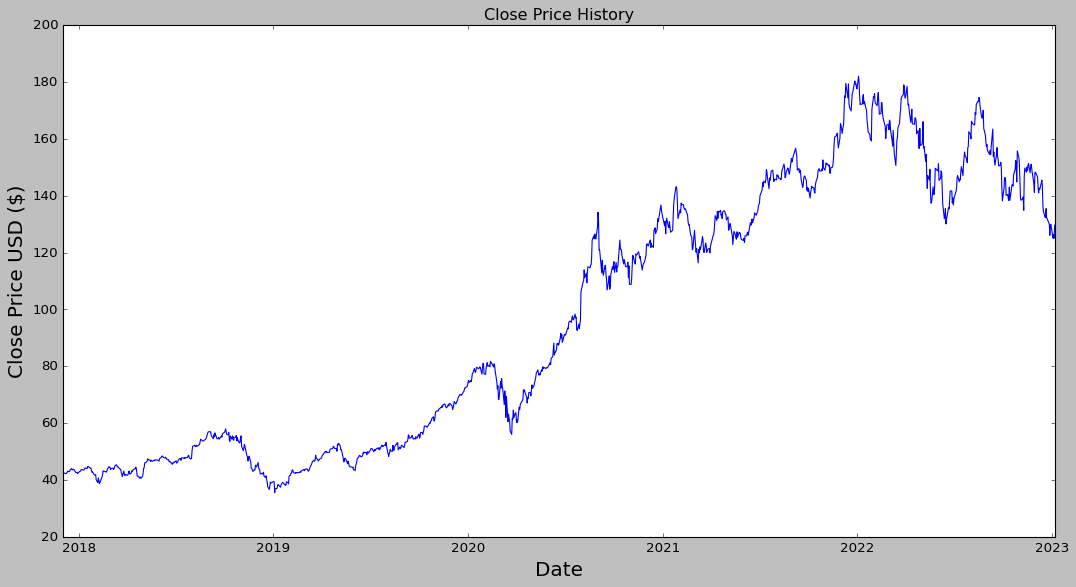

In [5]:
plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [6]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

1027

In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.04926176],
       [0.04712811],
       [0.04685499],
       ...,
       [0.62003929],
       [0.61089016],
       [0.64229751]])

In [8]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []
for i in range(days_train, len(train_data)):
    x_train.append(train_data[i - days_train: i, 0])
    y_train.append(train_data[i, 0])
    if i <= days_train + 0:
        print(x_train)
        print(y_train)
        print()

[array([0.04926176, 0.04712811, 0.04685499, 0.04577962, 0.04630879,
       0.04639412, 0.05202696, 0.05037125, 0.05134421, 0.05125885,
       0.05424597, 0.05842792, 0.0552189 , 0.05489461, 0.05602115,
       0.05602115, 0.04844244, 0.04849365, 0.04931297, 0.04615515,
       0.05132712, 0.05127591, 0.05264146, 0.05600409, 0.05489461,
       0.05486046, 0.05479217, 0.05648203, 0.05957155, 0.05803534,
       0.06300248, 0.06327557, 0.06191006, 0.05941794, 0.0594862 ,
       0.0546727 , 0.04936417, 0.05004693, 0.04398738, 0.04229752,
       0.04308269, 0.04368012, 0.03125373, 0.02440898, 0.03557224,
       0.02961507, 0.02212169, 0.02427243, 0.03502604, 0.0378083 ,
       0.04298027, 0.05257319, 0.05161729, 0.0506273 , 0.04929591,
       0.05173679, 0.05685756, 0.06278058, 0.06179056, 0.06132968,
       0.05600409, 0.05806948, 0.0591107 , 0.05885465, 0.0560553 ,
       0.05931553, 0.06450456, 0.06747461, 0.0644875 , 0.06187591,
       0.06223435, 0.06115901, 0.05651618, 0.05641377, 0.0496

In [9]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(937, 90, 1)

In [11]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [12]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
937/937 [==============================] - 54s 54ms/step - loss: 0.0023
Epoch 2/10
937/937 [==============================] - 37s 40ms/step - loss: 0.0011
Epoch 3/10
937/937 [==============================] - 38s 41ms/step - loss: 9.1292e-04
Epoch 4/10
937/937 [==============================] - 37s 40ms/step - loss: 6.3032e-04
Epoch 5/10
937/937 [==============================] - 37s 40ms/step - loss: 6.9728e-04
Epoch 6/10
937/937 [==============================] - 40s 42ms/step - loss: 5.0327e-04
Epoch 7/10
937/937 [==============================] - 37s 40ms/step - loss: 4.3165e-04
Epoch 8/10
937/937 [==============================] - 37s 40ms/step - loss: 4.0420e-04
Epoch 9/10
937/937 [==============================] - 38s 40ms/step - loss: 3.8266e-04
Epoch 10/10
937/937 [==============================] - 37s 40ms/step - loss: 4.2229e-04


In [14]:
test_data = scaled_data[training_data_len - days_train:, :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(days_train, len(test_data)):
    x_test.append(test_data[i - days_train: i, 0])

In [15]:
x_test = np.array(x_test)

In [16]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(256, 90, 1)

In [17]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

8/8 [==============================] - 1s 23ms/step


In [18]:
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

3.482314296999138

<ipython-input-19-407bfe881fa6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


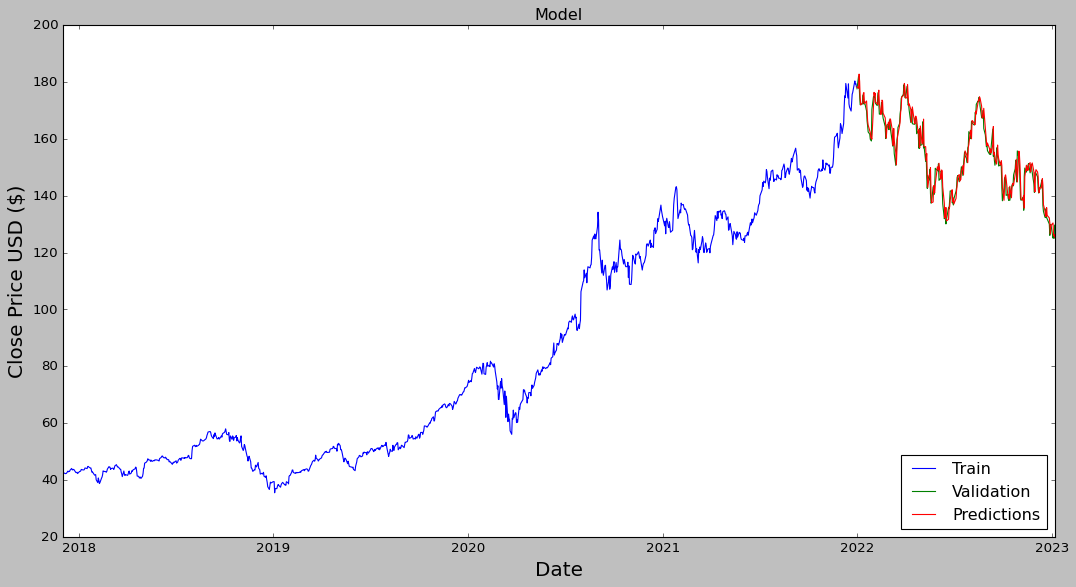

In [19]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
plt.show()

In [20]:
valid

,Close,Predictions
Date,,
2021-12-31 00:00:00-05:00,177.570007,178.244858
2022-01-03 00:00:00-05:00,182.009995,177.704300
2022-01-04 00:00:00-05:00,179.699997,182.735779
2022-01-05 00:00:00-05:00,174.919998,180.072556
2022-01-06 00:00:00-05:00,172.000000,174.687149
...,...,...
2022-12-30 00:00:00-05:00,129.929993,129.471741
2023-01-03 00:00:00-05:00,125.070000,130.414520
2023-01-04 00:00:00-05:00,126.360001,125.894806


In [21]:
apple_quote = yf.download(my_ticker, start=start_date, end=end_date)
new_df = apple_quote.filter(['Close'])
last_60_days = new_df[-days_train:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = [last_60_days_scaled]
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
pred_price

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 1s 1s/step


array([[129.54929]], dtype=float32)

In [22]:
day_after_end_date = end_date + dt.timedelta(days=1)
apple_quote2 = yf.download(my_ticker, start=end_date, end=day_after_end_date)
apple_quote2['Close']

[*********************100%***********************]  1 of 1 completed


Date
2023-01-09 00:00:00-05:00    130.149994
Name: Close, dtype: float64